# Feature Extraction From Audio

This is an example that shows loading, playing, generating and saving audio. It also explores plotting waveforms, and spectrograms with log frequency axis. Finally, it shows feature extraction including Zero Crossing Rate, Spectral Centroid, Spectral Rolloff, and MFCC.

[Kaggle Link](https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio/notebook)


In [162]:
import warnings
warnings.filterwarnings('ignore')


### Loading an audio file


In [163]:
import librosa
audio_path = './input/train_curated/0006ae4e.wav'
x, sr = librosa.load(audio_path)


### Playing Audio


In [164]:
import IPython.display as ipd
ipd.Audio(audio_path)


### Visualizing Audio


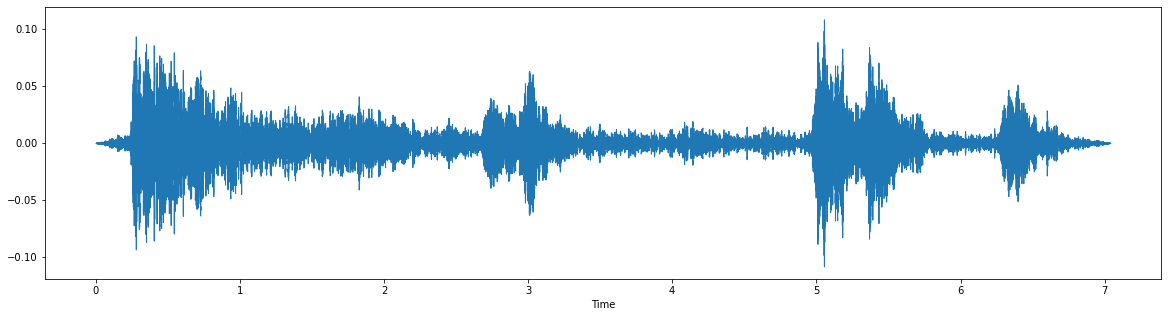

In [165]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)


#### Spectrogram


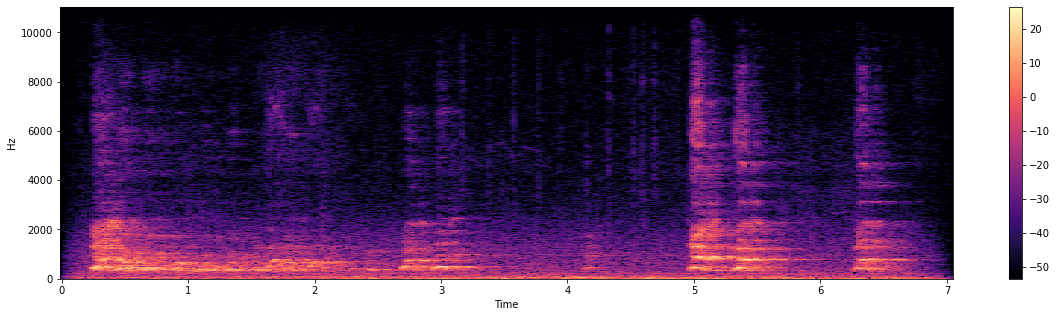

In [166]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


#### Log Frequency axis


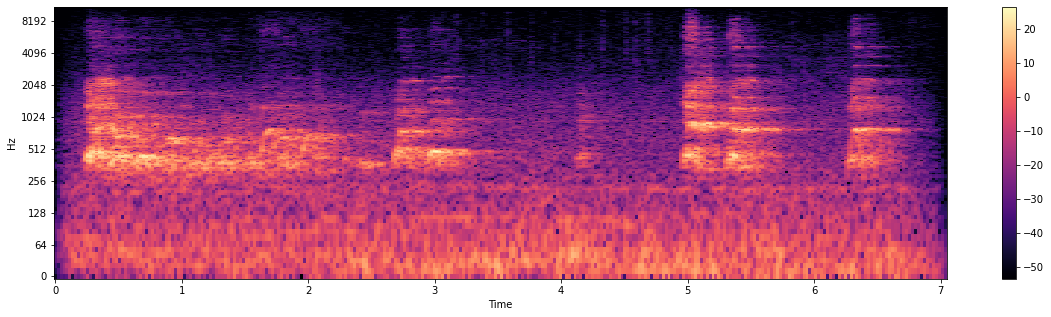

In [167]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


### Creating an audio signal

Let's create a 220hz audio signal using a numpy array


In [168]:
import numpy as np
sr = 22050
T = 5.0
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = 0.5 * np.sin(2*np.pi*220*t)


#### Playing the sound


In [169]:
ipd.Audio(x, rate=sr)


#### Saving the signal


In [170]:
import soundfile as sf
sf.write('./out/tone_220.wav', x, sr, 'PCM_24')


### Feature Extraction


In [171]:
x, sr = librosa.load('./input/train_noisy/000b6cfb.wav')
ipd.Audio(x, rate=sr)


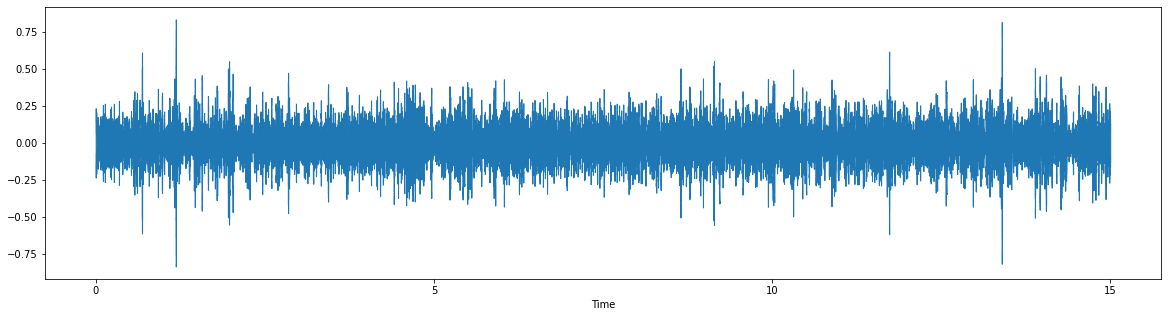

In [172]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)


#### Zero Crossing Rate


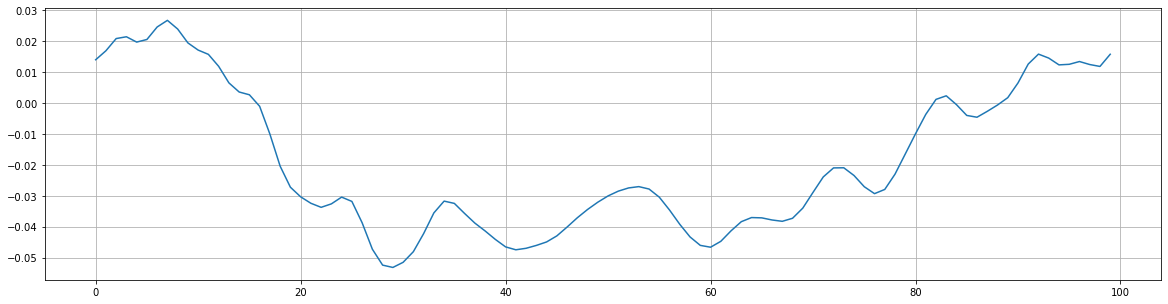

In [173]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()


In [174]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape


(100,)

In [175]:
sum(zero_crossings)


4

#### Spectral Centroid


In [176]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

spectral_centroids.shape


(646,)

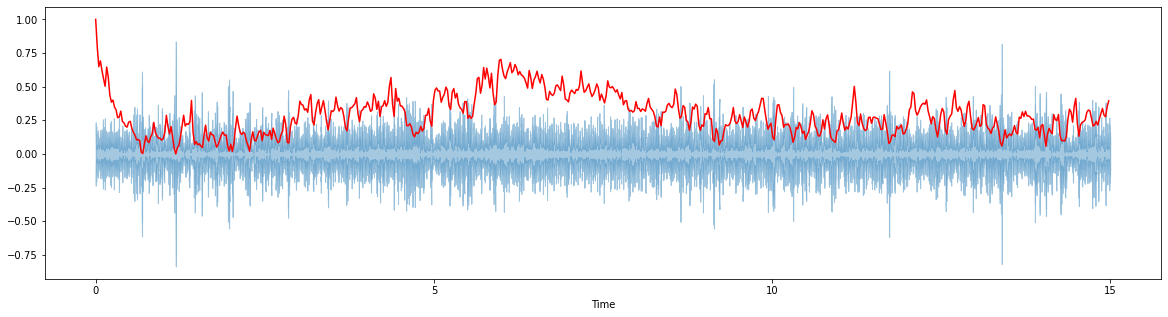

In [177]:
import sklearn

# Computing the time variable for visualization
plt.figure(figsize=(20, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


def normalize(x, axis=0):
    # Normalising the spectral centroid for visualization
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


#### Spectral Rolloff


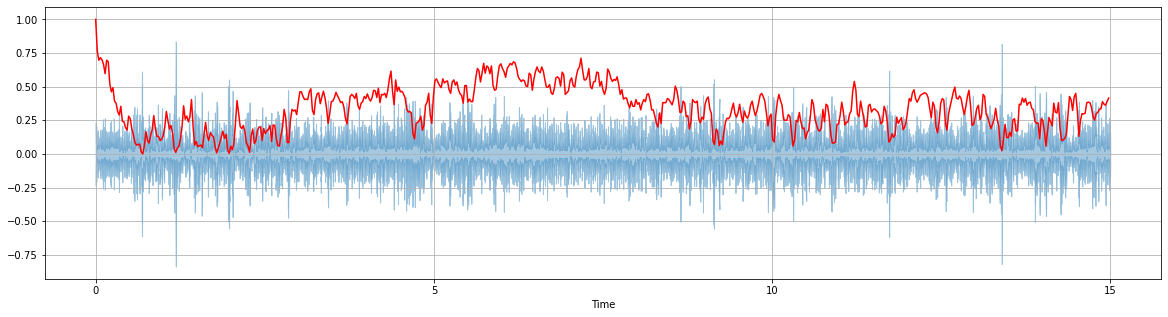

In [178]:
plt.figure(figsize=(20, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()


#### MFCC


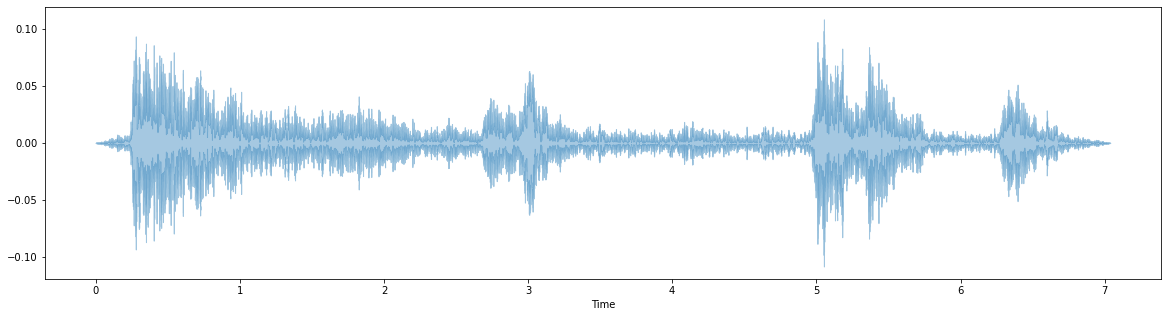

In [179]:
plt.figure(figsize=(20, 5))
x, fs = librosa.load('./input/train_curated/0006ae4e.wav')
librosa.display.waveshow(x, sr=sr, alpha=0.4)


WIP

https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio/notebook